In [1]:
# Import the dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
   
# Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kardla
Processing Record 2 of Set 1 | valparaiso
Processing Record 3 of Set 1 | brae
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | vardo
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | haradok
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | sao filipe
Processing Record 13 of Set 1 | narsaq
Processing Record 14 of Set 1 | skibbereen
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | ratnagiri
Processing Record 17 of Set 1 | felanitx
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | afyonkarahisar
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | pangody
Processing Record 22 of Set 1 | saryshag

Processing Record 33 of Set 4 | balkanabat
Processing Record 34 of Set 4 | lebu
Processing Record 35 of Set 4 | basse-pointe
Processing Record 36 of Set 4 | marzuq
Processing Record 37 of Set 4 | kaniama
Processing Record 38 of Set 4 | totness
Processing Record 39 of Set 4 | khapa
Processing Record 40 of Set 4 | tacoronte
Processing Record 41 of Set 4 | gwadar
Processing Record 42 of Set 4 | westpunt
City not found. Skipping...
Processing Record 43 of Set 4 | kuryk
Processing Record 44 of Set 4 | muisne
Processing Record 45 of Set 4 | sayyan
Processing Record 46 of Set 4 | maceio
Processing Record 47 of Set 4 | vila velha
Processing Record 48 of Set 4 | boa vista
Processing Record 49 of Set 4 | kazalinsk
City not found. Skipping...
Processing Record 50 of Set 4 | tarkwa
Processing Record 1 of Set 5 | najran
Processing Record 2 of Set 5 | garbolovo
Processing Record 3 of Set 5 | hornepayne
Processing Record 4 of Set 5 | pisticci
Processing Record 5 of Set 5 | ipixuna
Processing Record 6

Processing Record 25 of Set 8 | fianga
City not found. Skipping...
Processing Record 26 of Set 8 | cabo rojo
Processing Record 27 of Set 8 | constantine
Processing Record 28 of Set 8 | puerto del rosario
Processing Record 29 of Set 8 | vestmanna
Processing Record 30 of Set 8 | mpophomeni
Processing Record 31 of Set 8 | varberg
Processing Record 32 of Set 8 | bereda
Processing Record 33 of Set 8 | saint-francois
Processing Record 34 of Set 8 | santiago del estero
Processing Record 35 of Set 8 | santa maria
Processing Record 36 of Set 8 | puerto cabezas
Processing Record 37 of Set 8 | gornopravdinsk
Processing Record 38 of Set 8 | warmbad
Processing Record 39 of Set 8 | kattivakkam
Processing Record 40 of Set 8 | bethanien
Processing Record 41 of Set 8 | diapaga
Processing Record 42 of Set 8 | touros
Processing Record 43 of Set 8 | mwene-ditu
Processing Record 44 of Set 8 | gao
Processing Record 45 of Set 8 | moose factory
Processing Record 46 of Set 8 | biberach
Processing Record 47 of 

Processing Record 14 of Set 12 | sorland
Processing Record 15 of Set 12 | raga
Processing Record 16 of Set 12 | manama
Processing Record 17 of Set 12 | candido mendes
Processing Record 18 of Set 12 | abnub
Processing Record 19 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 20 of Set 12 | conde
Processing Record 21 of Set 12 | beni
Processing Record 22 of Set 12 | kopavogur
Processing Record 23 of Set 12 | male
Processing Record 24 of Set 12 | alta floresta
Processing Record 25 of Set 12 | bella vista
Processing Record 26 of Set 12 | murgab
Processing Record 27 of Set 12 | dwarka
Processing Record 28 of Set 12 | chake chake
Processing Record 29 of Set 12 | rorvik
Processing Record 30 of Set 12 | teguldet
Processing Record 31 of Set 12 | chilca
Processing Record 32 of Set 12 | matveyevka
Processing Record 33 of Set 12 | ampanihy
Processing Record 34 of Set 12 | illapel
Processing Record 35 of Set 12 | bom jesus
Processing Record 36 of Set 12 | aspindza
Proc

In [8]:
len(city_data)

578

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kardla,58.9978,22.7492,47.05,65,75,13.80,EE,2021-10-22 03:44:41
1,Valparaiso,-33.0393,-71.6273,55.04,82,40,4.61,CL,2021-10-22 03:40:24
2,Brae,60.3964,-1.3530,39.11,60,99,27.63,GB,2021-10-22 03:44:41
3,Jamestown,42.0970,-79.2353,56.52,89,90,11.01,US,2021-10-22 03:39:42
4,Ponta Do Sol,32.6667,-17.1000,69.71,63,40,4.38,PT,2021-10-22 03:41:24
5,Vardo,70.3705,31.1107,30.40,59,100,25.61,NO,2021-10-22 03:42:28
6,Hermanus,-34.4187,19.2345,58.89,71,100,17.65,ZA,2021-10-22 03:44:42
7,Saint-Philippe,-21.3585,55.7679,81.48,72,3,5.79,RE,2021-10-22 03:43:27
8,Ushuaia,-54.8000,-68.3000,38.86,81,40,0.00,AR,2021-10-22 03:40:06
9,Haradok,55.4624,29.9816,47.68,77,81,20.20,BY,2021-10-22 03:44:42


In [10]:
# Reorder the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kardla,EE,2021-10-22 03:44:41,58.9978,22.7492,47.05,65,75,13.80
1,Valparaiso,CL,2021-10-22 03:40:24,-33.0393,-71.6273,55.04,82,40,4.61
2,Brae,GB,2021-10-22 03:44:41,60.3964,-1.3530,39.11,60,99,27.63
3,Jamestown,US,2021-10-22 03:39:42,42.0970,-79.2353,56.52,89,90,11.01
4,Ponta Do Sol,PT,2021-10-22 03:41:24,32.6667,-17.1000,69.71,63,40,4.38


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

#Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

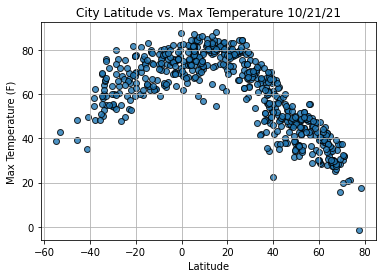

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

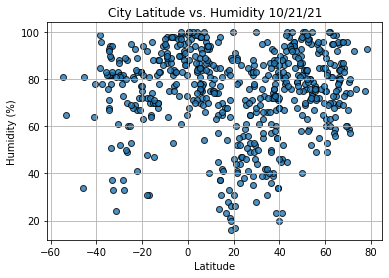

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

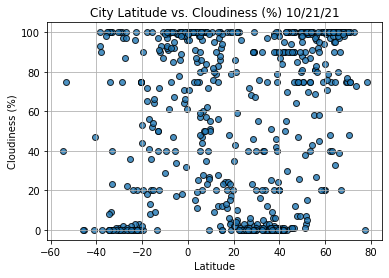

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

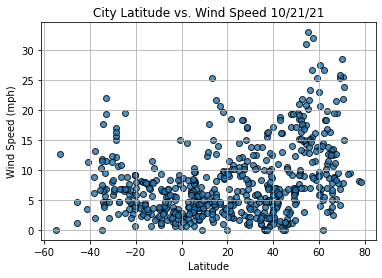

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
  
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                   Skibbereen
Country                        IE
Date          2021-10-22 03:44:43
Lat                         51.55
Lng                       -9.2667
Max Temp                     48.0
Humidity                       76
Cloudiness                      3
Wind Speed                   9.13
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
573     True
574     True
575     True
576     True
577     True
Name: Lat, Length: 578, dtype: bool

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

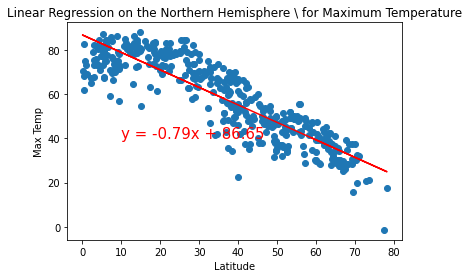

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

plt.show()


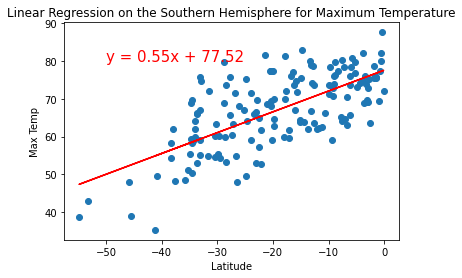

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50, 80))

